<a href="https://colab.research.google.com/github/Shouvik-7/Pytorch_examples/blob/main/Pytorch_binaryclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od

od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shouvik07
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 1.33MB/s]

In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [ ]:
data_df = pd.read_csv('/content/rice-type-classification/riceClassification.csv')
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
data_df.dropna(inplace=True)
data_df.drop(['id'], axis = 1, inplace = True)
print(data_df.shape)

(18185, 11)


In [ ]:
print(data_df['Class'].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [ ]:
original_df = data_df.copy()


for column in data_df.columns:
  data_df[column] = data_df[column]/data_df[column].abs().max()

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [ ]:
X = np.array(data_df.iloc[:, :-1])
Y = np.array(data_df.iloc[:, -1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [ ]:
class dataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.tensor(X, dtype=torch.float32).to(device)
    self.y = torch.tensor(y, dtype=torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.y[index]

In [ ]:
training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [ ]:
train_dataloader = DataLoader(training_data, batch_size=8, shuffle = True)
val_dataloader = DataLoader(validation_data, batch_size=8, shuffle = True)
test_dataloader = DataLoader(testing_data, batch_size=8, shuffle = True)

In [ ]:
for x,y in train_dataloader:
  print(x)
  print("=====")
  print(y)
  break

tensor([[0.7577, 0.7836, 0.8491, 0.9027, 0.7205, 0.8705, 0.7736, 0.6937, 0.8635,
         0.5236],
        [0.6308, 0.8902, 0.6197, 0.9822, 0.6008, 0.7942, 0.5311, 0.7054, 0.6951,
         0.8150],
        [0.6238, 0.7819, 0.6953, 0.9477, 0.5973, 0.7898, 0.6709, 0.6558, 0.7955,
         0.6381],
        [0.6548, 0.8181, 0.7017, 0.9540, 0.6210, 0.8092, 0.7589, 0.6788, 0.7792,
         0.6614],
        [0.6419, 0.8483, 0.6721, 0.9662, 0.6157, 0.8012, 0.5390, 0.6919, 0.7354,
         0.7161],
        [0.5979, 0.8446, 0.6196, 0.9762, 0.5669, 0.7733, 0.6743, 0.6746, 0.7205,
         0.7733],
        [0.7440, 0.8417, 0.7746, 0.9413, 0.7109, 0.8625, 0.6176, 0.7122, 0.8043,
         0.6165],
        [0.8511, 0.8829, 0.8436, 0.9336, 0.8140, 0.9226, 0.7432, 0.7539, 0.8213,
         0.5938]])
=====
tensor([0., 1., 1., 1., 1., 1., 0., 0.])


In [ ]:
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()

    self.input_layer = nn.Linear(X.shape[1], 10)
    self.linear = nn.Linear(10,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

In [ ]:
model = MyModel().to(device)

In [ ]:
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [ ]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []


epochs = 10
for epoch in range(epochs):
  total_loss_train = 0
  total_loss_validation = 0
  total_acc_train = 0
  total_acc_validation = 0

  for data in train_dataloader:
    inputs, labels = data
    prediction = model(inputs).squeeze(1)

    batch_loss = criterion(prediction,labels)
    total_loss_train += batch_loss.item()
    acc = ((prediction).round() == labels).sum().item()
    total_acc_train += acc

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  with torch.no_grad():
    for data in val_dataloader:
      inputs, labels = data
      prediction = model(inputs).squeeze(1)
      batch_loss = criterion(prediction, labels)

      total_loss_validation += batch_loss.item()
      acc = ((prediction).round() == labels).sum().item()
      total_acc_validation += acc
  total_loss_train_plot.append(round(total_loss_train/1000,4))
  total_loss_validation_plot.append(round(total_loss_validation/1000,4))

  total_acc_train_plot.append(round(total_acc_train/training_data.__len__()*100,4))
  total_acc_validation_plot.append(round(total_acc_validation/validation_data.__len__()*100,4))

  print(f"Epoch no.:{epoch+1} Train Loss:{round(total_loss_train/1000,4)} Validation Loss:{round(total_loss_validation/1000,4)}")

Epoch no.:1 Train Loss:0.6424 Validation Loss:0.049
Epoch no.:2 Train Loss:0.1373 Validation Loss:0.0228
Epoch no.:3 Train Loss:0.0833 Validation Loss:0.0181
Epoch no.:4 Train Loss:0.0705 Validation Loss:0.0161
Epoch no.:5 Train Loss:0.0658 Validation Loss:0.0155
Epoch no.:6 Train Loss:0.0637 Validation Loss:0.0158
Epoch no.:7 Train Loss:0.0636 Validation Loss:0.0164
Epoch no.:8 Train Loss:0.0629 Validation Loss:0.0157
Epoch no.:9 Train Loss:0.0621 Validation Loss:0.0174
Epoch no.:10 Train Loss:0.0632 Validation Loss:0.0151


In [ ]:
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0

  for data in test_dataloader:
    inputs, labels = data
    prediction = model(inputs).squeeze(1)

    batch_loss_test = criterion(prediction, labels).item()
    total_loss_test += batch_loss_test
    acc = ((prediction).round() == labels).sum().item()

    total_acc_test += acc

print("Accuracy", round(total_acc_test/testing_data.__len__() * 100,4))

Accuracy 98.1672


Text(0, 0.5, 'Accuracy')

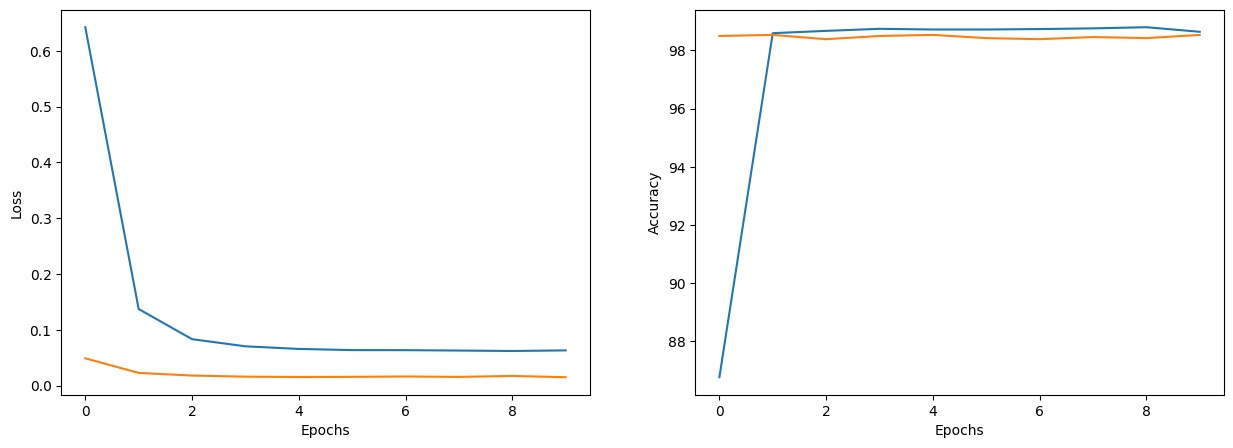

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

axes[0].plot(total_loss_train_plot, label = 'Training Loss')
axes[0].plot(total_loss_validation_plot, label = 'Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')


axes[1].plot(total_acc_train_plot, label = 'Training Accuracy')
axes[1].plot(total_acc_validation_plot, label = 'Validation  Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
